importation de pandas et du fichier csv

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('covid-hospit.csv', sep=';')

Question 1

In [3]:
df.head()

,dep,sexe,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
0,01,0,2020-03-18,2,0,NaN,NaN,NaN,1,0
1,01,1,2020-03-18,1,0,NaN,NaN,NaN,1,0
2,01,2,2020-03-18,1,0,NaN,NaN,NaN,0,0
3,02,0,2020-03-18,41,10,NaN,NaN,NaN,18,11
4,02,1,2020-03-18,19,4,NaN,NaN,NaN,11,6


In [4]:
df.tail()

,dep,sexe,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
338240,976,0,2023-03-31,0,0,0.0,0.0,0.0,1766,163
338241,976,1,2023-03-31,0,0,0.0,0.0,0.0,739,100
338242,976,2,2023-03-31,0,0,0.0,0.0,0.0,1002,61
338243,978,0,2023-03-31,0,0,0.0,0.0,0.0,0,0
338244,978,1,2023-03-31,0,0,0.0,0.0,0.0,0,0


On détermine type

In [5]:
df['dep']

,dep
0,01
1,01
2,01
3,02
4,02
...,...
338240,976
338241,976
338242,976
338243,978


In [6]:
df['dep'].dtype

dtype('O')

In [7]:
df['sexe'].dtype

dtype('int64')

In [8]:
df['jour'].dtype

dtype('O')

In [9]:
df['hosp'].dtype

dtype('int64')

In [10]:
df['rea'].dtype

dtype('int64')

In [11]:
df['HospConv'].dtype

dtype('float64')

In [12]:
df['SSR_USLD'].dtype

dtype('float64')

In [13]:
df['autres'].dtype

dtype('float64')

In [14]:
df['rad'].dtype

dtype('int64')

In [15]:
df['dc'].dtype

dtype('int64')

dep et jour sont de types objets, sexe, hosp, rea, rad et dc sonts de type int et hospconv, ssr_usld et autres sont de type float

In [ ]:
Question 2 conversion datetime

In [16]:
df['jour'] = pd.to_datetime(df['jour'])

In [17]:
df

,dep,sexe,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
0,01,0,2020-03-18,2,0,NaN,NaN,NaN,1,0
1,01,1,2020-03-18,1,0,NaN,NaN,NaN,1,0
2,01,2,2020-03-18,1,0,NaN,NaN,NaN,0,0
3,02,0,2020-03-18,41,10,NaN,NaN,NaN,18,11
4,02,1,2020-03-18,19,4,NaN,NaN,NaN,11,6
...,...,...,...,...,...,...,...,...,...,...
338240,976,0,2023-03-31,0,0,0.0,0.0,0.0,1766,163
338241,976,1,2023-03-31,0,0,0.0,0.0,0.0,739,100
338242,976,2,2023-03-31,0,0,0.0,0.0,0.0,1002,61
338243,978,0,2023-03-31,0,0,0.0,0.0,0.0,0,0


In [18]:
df['jour'].dtype

dtype('<M8[ns]')

Q 3 suppression des colonnes

In [19]:
agg_par_jour = df.drop ( [ 'dep' , 'sexe' ] , axis =1).groupby('jour').sum()

In [20]:
agg_par_jour.tail()

,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
jour,,,,,,,
2023-03-27,25986,1448,14526.0,9267.0,745.0,1715906,270815
2023-03-28,26121,1433,14650.0,9293.0,745.0,1716872,270892
2023-03-29,26137,1460,14649.0,9281.0,747.0,1717875,270959
2023-03-30,26142,1458,14627.0,9304.0,753.0,1718611,271030
2023-03-31,26065,1413,14604.0,9315.0,733.0,1719619,271091


Q 4 traçage des données

<Axes: title={'center': 'evolution␣des ␣hospitalisations␣par␣jour'}, xlabel='jour'>

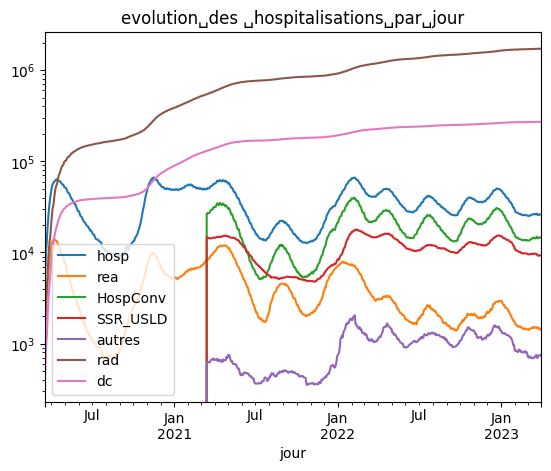

In [44]:
agg_par_jour.plot( title="evolution␣des ␣hospitalisations␣par␣jour", logy=True)

In [ ]:
Q5 faire meme pour le sexe

In [23]:
agg_par_sexe = df.drop ( [ 'dep', 'jour' ] , axis =1).groupby('sexe').sum()

In [24]:
agg_par_sexe.tail()

,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
sexe,,,,,,,
0,19367212,2269590,7057261.0,4137815.0,348798.0,478543256,90758138
1,9574056,1529558,3451096.0,1768795.0,160221.0,237421725,52012309
2,9552614,720849,3521255.0,2302730.0,174230.0,237080522,38103103


In [31]:
agg_par_jour_sexe = df.drop(['dep', 'jour'], axis=1).groupby([ 'sexe']).sum()

In [32]:
agg_par_jour_sexe

,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
sexe,,,,,,,
0,19367212,2269590,7057261.0,4137815.0,348798.0,478543256,90758138
1,9574056,1529558,3451096.0,1768795.0,160221.0,237421725,52012309
2,9552614,720849,3521255.0,2302730.0,174230.0,237080522,38103103


<Axes: title={'center': 'Hosp & Réa par sexe'}, xlabel='sexe'>

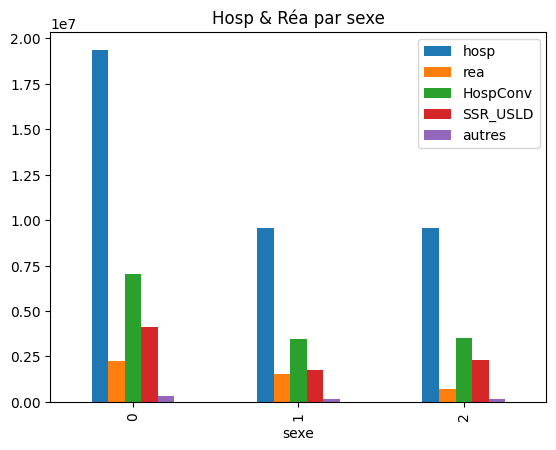

In [43]:
agg_par_jour_sexe[["hosp", "rea","HospConv","SSR_USLD","autres"]].plot(kind="bar",title="Hosp & Réa par sexe")


In [36]:
sexe = agg_par_jour_sexe.unstack(level='sexe')

In [37]:
sexe.head()

sexe
hosp  0       19367212.0
      1        9574056.0
      2        9552614.0
rea   0        2269590.0
      1        1529558.0
dtype: float64

Q 6

In [45]:
agg_par_jour_diff = agg_par_jour.diff()


<Axes: title={'center': 'Séries différenciées'}, xlabel='jour'>

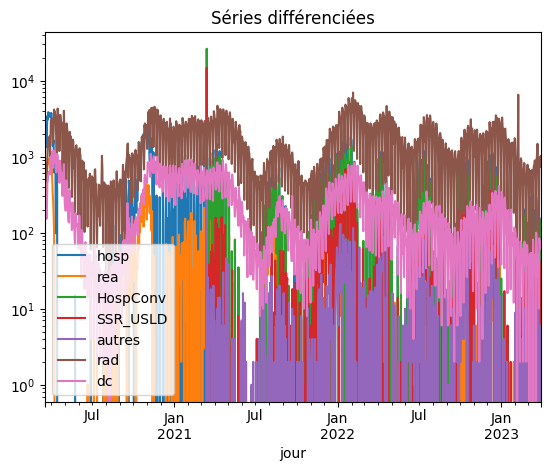

In [46]:
agg_par_jour_diff.plot(title="Séries différenciées",logy=True)

série lissée

In [47]:
agg_par_jour_diff_smooth = agg_par_jour.diff().rolling(7).mean()


<Axes: title={'center': 'Séries différenciées et lissées'}, xlabel='jour'>

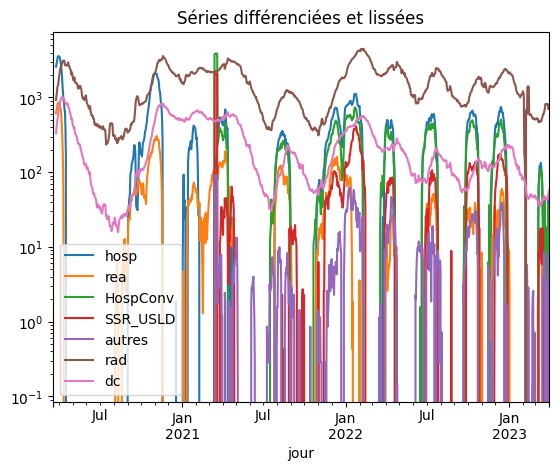

In [48]:
agg_par_jour_diff_smooth.plot(title="Séries différenciées et lissées",logy=True)